Відрізок 1:
S_0(x) = 1.75 + 6.8249(x - 0.0) + 0.0(x - 0.0)^2 + -54.3715(x - 0.0)^3, x належить [0.0, 0.2]
Відрізок 2:
S_1(x) = 2.68 + 0.3003(x - 0.2) + -32.6229(x - 0.2)^2 + 52.0733(x - 0.2)^3, x належить [0.2, 0.5]
Відрізок 3:
S_2(x) = 1.24 + -5.2137(x - 0.5) + 14.243(x - 0.5)^2 + -11.1471(x - 0.5)^3, x належить [0.5, 0.9]
Відрізок 4:
S_3(x) = 0.72 + 0.7034(x - 0.9) + 0.8665(x - 0.9)^2 + 0.4814(x - 0.9)^3, x належить [0.9, 1.5]
Значення сплайна:
x = 0.00, y = 1.750
x = 0.02, y = 1.925
x = 0.03, y = 2.079
x = 0.05, y = 2.215
x = 0.06, y = 2.332
x = 0.08, y = 2.431
x = 0.09, y = 2.513
x = 0.11, y = 2.580
x = 0.12, y = 2.631
x = 0.14, y = 2.667
x = 0.15, y = 2.690
x = 0.17, y = 2.700
x = 0.18, y = 2.698
x = 0.20, y = 2.684
x = 0.21, y = 2.660
x = 0.23, y = 2.626
x = 0.24, y = 2.583
x = 0.26, y = 2.532
x = 0.27, y = 2.473
x = 0.29, y = 2.408
x = 0.30, y = 2.337
x = 0.32, y = 2.261
x = 0.33, y = 2.180
x = 0.35, y = 2.096
x = 0.36, y = 2.010
x = 0.38, y = 1.921
x = 0.39, y = 1.832
x = 0.41,

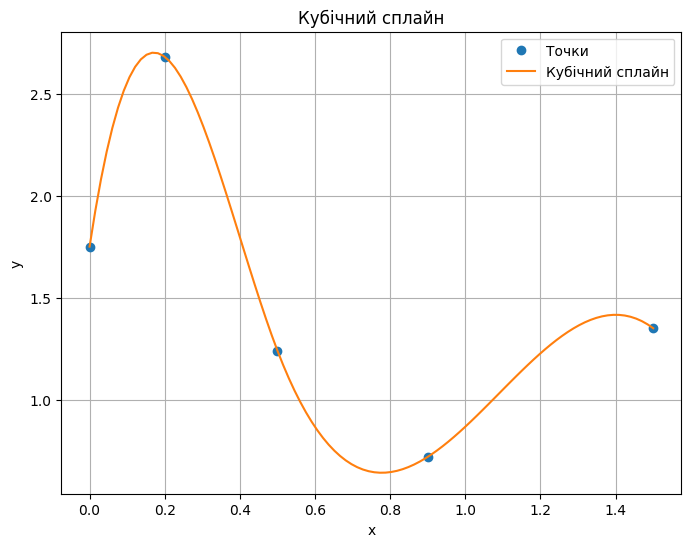

In [5]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
# Задані точки
x = np.array([0, 0.2, 0.5, 0.9, 1.5])
y = np.array([1.75, 2.68, 1.24, 0.72, 1.35])
n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n)
alpha = np.zeros(n)
for i in range(1, n):
 alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])
l = np.ones(n)
mu = np.zeros(n)
z = np.zeros(n)
for i in range(1, n):
 l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
 mu[i] = h[i] / l[i]
 z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]
# Виправлення обчислення коефіцієнтів для останнього відрізка
#c[n-1] = 0
c[n-1] = (alpha[n-1] - h[n-2] * z[n-2]) / (2 * (h[n-2] + mu[n-1]))
b[n-1] = (a[n] - a[n-1]) / h[n-1] - h[n-1] * (2 * c[n-1] + c[n-2]) / 3
d[n-1] = (c[n-1] - c[n-2]) / (3 * h[n-1])
for j in range(n - 2, -1, -1):
 c[j] = z[j] - mu[j] * c[j+1]
 b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
 d[j] = (c[j+1] - c[j]) / (3 * h[j])
# Виведення аналітичного вигляду кубічного сплайна для кожного відрізка
for i in range(n):
 print(f"Відрізок {i+1}:")
 print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")
# Побудова кубічного сплайна
cs = CubicSpline(x, y)
# Генерація нових точок для гладкого графіку сплайна
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)
# Роздрукуйте значення сплайна
print("Значення сплайна:")
for i in range(len(x_new)):
 print(f"x = {x_new[i]:.2f}, y = {y_new[i]:.3f}")
# Побудова графіку
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()